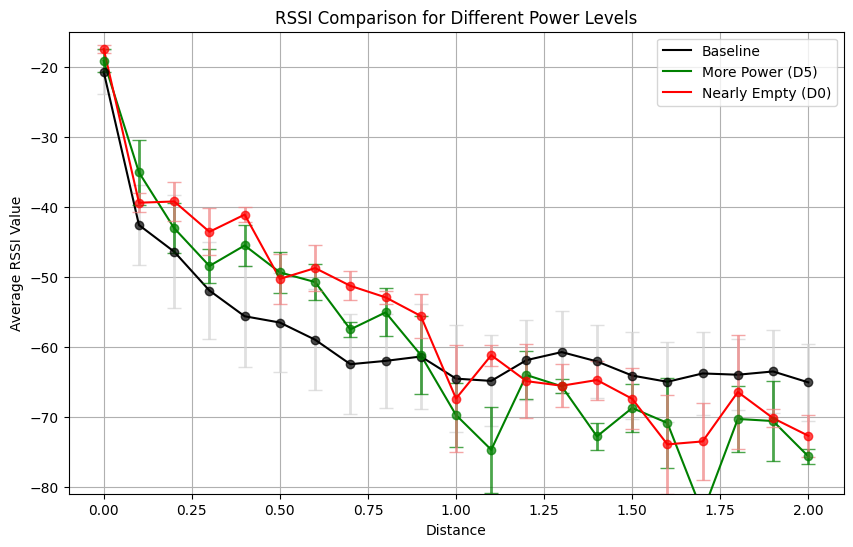

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('Experiment_3_0_2m.csv')
df2 = pd.read_csv('Experiment_4.csv')

rssi_stats = df1.groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()

df2['MAC-Address-Group'] = df2['MAC-Address'].apply(lambda x: 'More Power' if x.startswith('D5') else 'Nearly Empty')

rssi_stats_d5 = df2[df2['MAC-Address-Group'] == 'More Power'].groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()
rssi_stats_d0 = df2[df2['MAC-Address-Group'] == 'Nearly Empty'].groupby('Distance')['RSSI-Value'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))

plt.errorbar(
    rssi_stats['Distance'],
    rssi_stats['mean'],
    yerr=rssi_stats['std'],
    fmt='o',
    capsize=5,
    color='black',
    ecolor='lightgray',
    elinewidth=2,
    alpha=0.7
)

plt.plot(rssi_stats['Distance'], rssi_stats['mean'], linestyle='-', color='black', label='Baseline')

plt.errorbar(
    rssi_stats_d5['Distance'],
    rssi_stats_d5['mean'],
    yerr=rssi_stats_d5['std'],
    fmt='o',
    capsize=5,
    color='green',
    ecolor='green',
    elinewidth=2,
    alpha=0.7
)
plt.plot(rssi_stats_d5['Distance'], rssi_stats_d5['mean'], linestyle='-', color='green', label='More Power (D5)')

# Plot for MAC starting with D0 (Nearly Empty)
plt.errorbar(
    rssi_stats_d0['Distance'],
    rssi_stats_d0['mean'],
    yerr=rssi_stats_d0['std'],
    fmt='o',
    capsize=5,
    color='red',         # Color for the D0 MAC address
    ecolor='lightcoral', # Error bar color for D0
    elinewidth=2,
    alpha=0.7
)
plt.plot(rssi_stats_d0['Distance'], rssi_stats_d0['mean'], linestyle='-', color='red', label='Nearly Empty (D0)')

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Average RSSI Value')
plt.title('RSSI Comparison for Different Power Levels')

# Set the y-axis limits
plt.ylim(-81, -15)

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
